In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Necessary Libraries**

---



In [2]:
import numpy as np
import cv2
import os

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# **Loading the Dataset**

---



Base Path

In [4]:
dir_path = "/content/drive/MyDrive/Brain Tumour Detection Using CNN/archive/"
os.listdir(dir_path)

['yes', 'no', 'brain_tumor_dataset']

Folder Paths

In [292]:
yes_folder = dir_path + "/yes/"
no_folder  = dir_path + '/no/'
img_list = os.listdir(yes_folder)

Number of Images

In [293]:
print("Number of Images with Positive Brain Tumour: ", len(os.listdir(yes_folder)))
print("Number of Images with Negative Brain Tumour: ", len(os.listdir(no_folder )))

Number of Images with Positive Brain Tumour:  155
Number of Images with Negative Brain Tumour:  98


Tumour Positive Images

In [250]:
tumour_imgs = list()

for i in img_list:

    img = cv2.imread(yes_folder + i)
    img = cv2.resize(img, (240, 240))
    tumour_imgs.append(img)

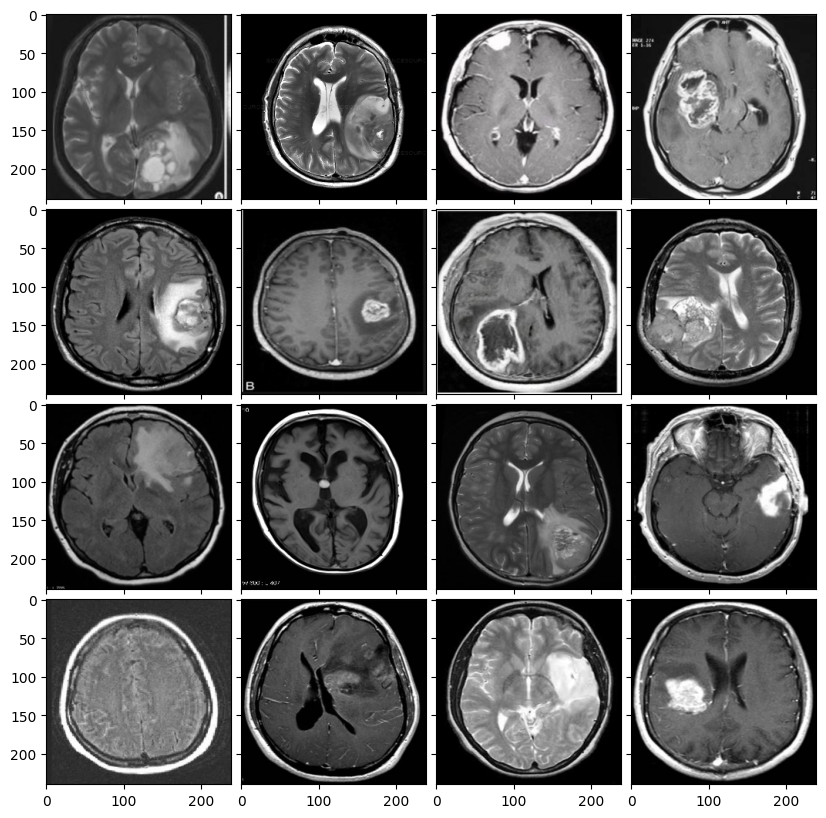

In [251]:
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4),  axes_pad=0.1)

for ax,img in zip(grid, tumour_imgs[0:16]):
    ax.imshow(img)

plt.title("Brains with Tumour")
plt.show()

# **Showing Working on a Sample Image**

---



Original Image

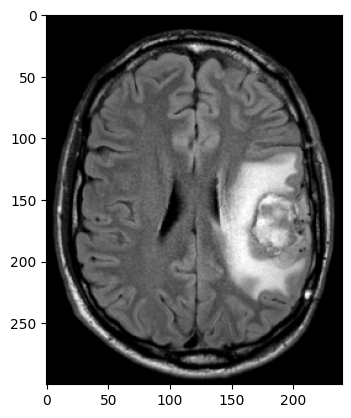

In [281]:
im1 = cv2.imread(yes_folder+img_list[4])
plt.imshow(im1)

Gray Image

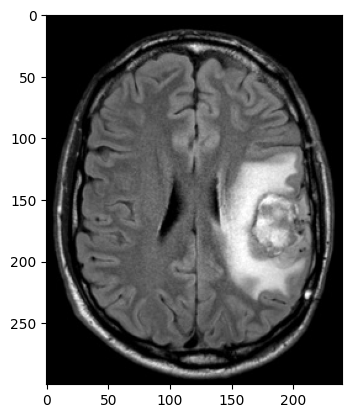

In [282]:
im1gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
plt.imshow(im1gray, "gray")

Thresholded Image

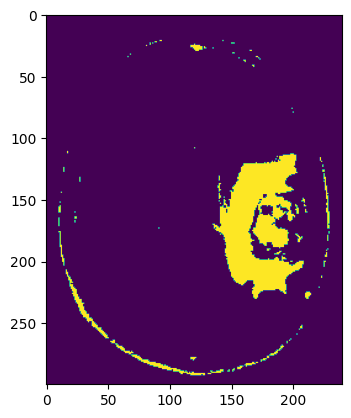

In [283]:
(T, im1thresh) = cv2.threshold(im1gray, 155, 255, cv2.THRESH_BINARY)
plt.imshow(im1thresh)

Morpological Operation

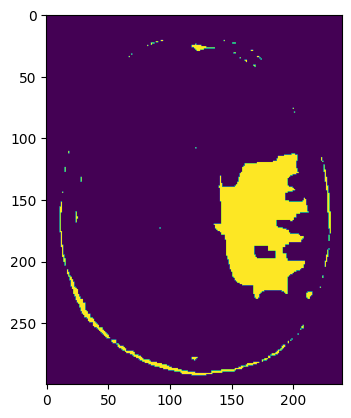

In [284]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
im1closed = cv2.morphologyEx(im1thresh, cv2.MORPH_CLOSE, kernel)

plt.imshow(im1closed)

Erosion

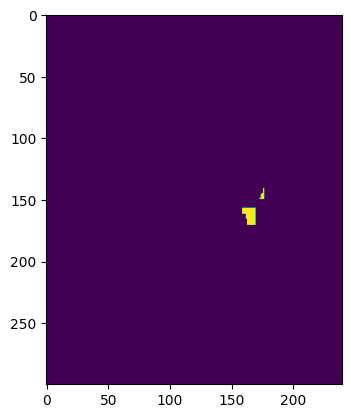

In [285]:
im1erode = cv2.erode(im1closed, None, iterations = 17)
plt.imshow(im1erode)

Dilation

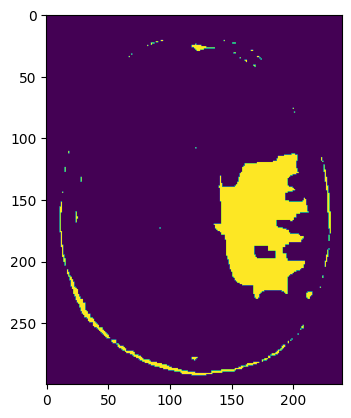

In [286]:
im1dilate = cv2.dilate(im1erode, None, iterations = 17)
plt.imshow(im1closed)

Bitwise AND Result

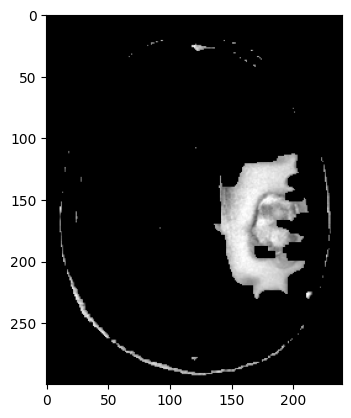

In [287]:
ret,mask = cv2.threshold(im1closed, 155, 255, cv2.THRESH_BINARY)

im1final = cv2.bitwise_and(im1, im1, mask = mask)
plt.imshow(im1final)

Canny Edge Detection

In [288]:
def auto_canny(img, sigma=0.33):

    med = np.median(img)

    img_lower = int(max(0, (1.0 - sigma) * med))
    img_upper = int(min(255, (1.0 + sigma) * med))

    img_edged = cv2.Canny(img, img_lower, img_upper)

    return img_edged

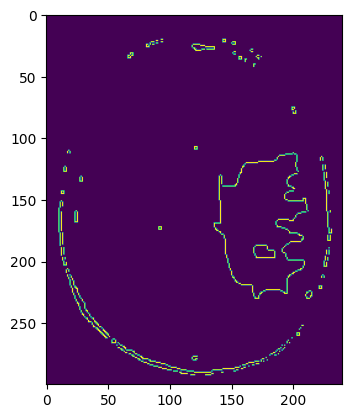

In [289]:
im1canny = auto_canny(im1closed)
plt.imshow(im1canny)

Final Result

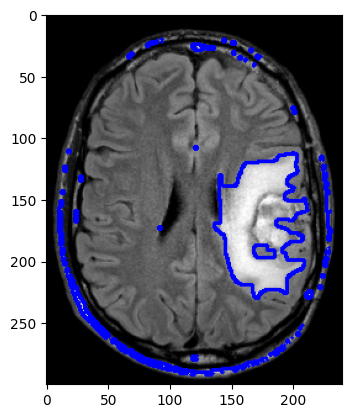

In [290]:
(cnts, _) = cv2.findContours(im1canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(im1, cnts, -1, (0, 0, 255), 2)
plt.imshow(im1)

# **Fast AI**

---



In [9]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.models import *

## **Creating ImageDataLoader**

---



In [10]:
data_path = dir_path + "/brain_tumor_dataset/"
os.listdir(data_path)

['no', 'yes']

In [11]:
data = ImageDataLoaders.from_folder(data_path, train=".", valid_pct=0.25, item_tfms=Resize(224), bs=24,
                                  num_workers=0)

print(data.vocab)

['no', 'yes']


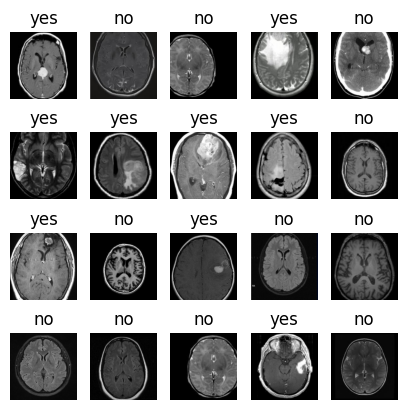

In [12]:
data.show_batch(max_n=20, nrows=4, figsize=(5,5))

## **Using ResNet34**

---



Model Initialization

In [119]:
learner1 = vision_learner(data, models.resnet34, metrics=accuracy).to_fp16()

Training the Model

In [120]:
learner1.fit(15)

epoch,train_loss,valid_loss,accuracy,time
0,1.091325,0.862721,0.650794,00:03
1,0.731096,0.296839,0.904762,00:03
2,0.557843,0.344179,0.904762,00:03
3,0.431595,0.376696,0.825397,00:03
4,0.363344,0.346368,0.841270,00:03
5,0.311874,0.254325,0.873016,00:03
6,0.266933,0.176563,0.873016,00:03
7,0.234391,0.181040,0.888889,00:03
8,0.205467,0.201048,0.904762,00:03
9,0.188428,0.221016,0.888889,00:03


Determining Optimal Learning Rate

SuggestedLRs(valley=0.00015848931798245758)

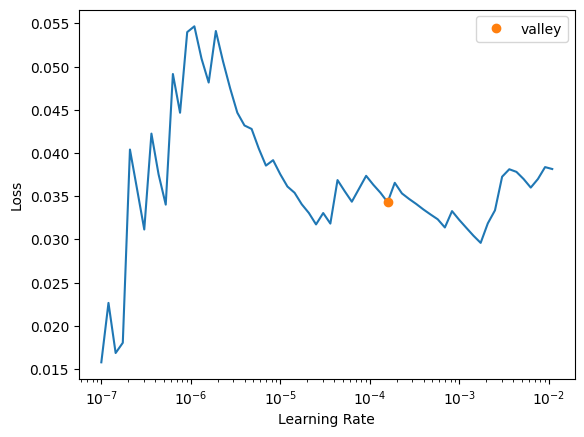

In [122]:
learner1.lr_find()

Fine Tuning the Model

epoch,train_loss,valid_loss,accuracy,time
0,0.024681,0.141115,0.952381,00:03
1,0.021813,0.155187,0.920635,00:03
2,0.051260,0.148796,0.952381,00:03
3,0.049942,0.176614,0.920635,00:03
4,0.040964,0.162242,0.952381,00:03
5,0.036986,0.180127,0.920635,00:03


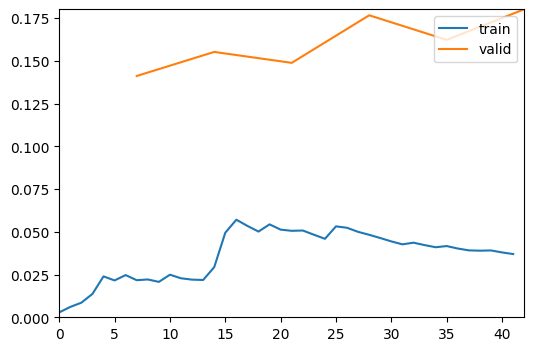

In [123]:
learner1.fit_one_cycle(6, 0.00015848931798245758, cbs=[ShowGraphCallback()])

In [127]:
learner1.fine_tune(15)

epoch,train_loss,valid_loss,accuracy,time
0,0.006361,0.218959,0.920635,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.044620,0.159900,0.952381,00:03
1,0.053679,0.191300,0.936508,00:03
2,0.050546,0.138393,0.936508,00:03
3,0.035962,0.288202,0.936508,00:03
4,0.078880,0.350689,0.936508,00:03
5,0.063967,0.145391,0.968254,00:03
6,0.056722,0.364663,0.920635,00:03
7,0.050183,0.366397,0.936508,00:03
8,0.042975,0.238867,0.952381,00:03
9,0.038762,0.194309,0.952381,00:03


Model Results

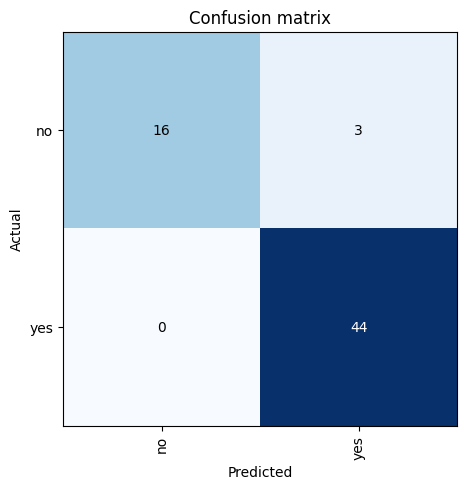

In [130]:
interp1 = ClassificationInterpretation.from_learner(learner1)
interp1.plot_confusion_matrix()

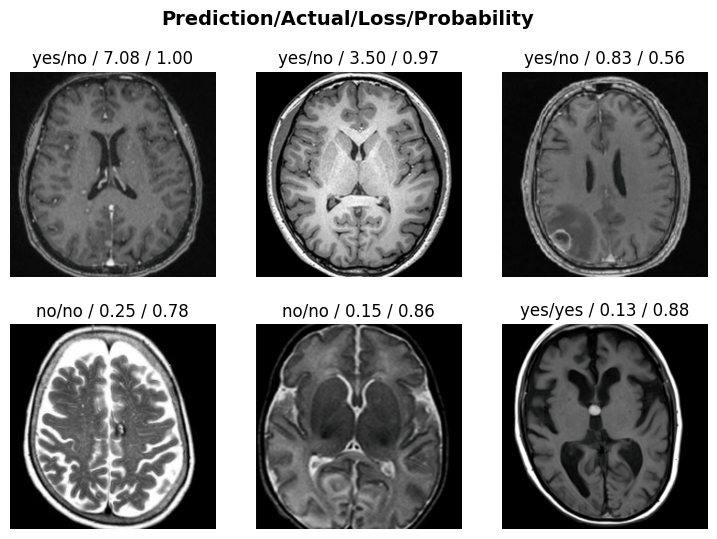

In [131]:
interp1.plot_top_losses(6)

Saving the Model

In [145]:
learner1.export("/tmp/model_1.pkl")

Sample Predictions from Saved Model

In [146]:
model_export1 = load_learner("/tmp/model_1.pkl")

In [147]:
model_export1.predict(tumour_imgs[0])

('yes', tensor(1), tensor([3.5085e-10, 1.0000e+00]))

## **Using VGG16**

---



Model Initialization

In [ ]:
learner2 = vision_learner(data, models.vgg16, metrics=accuracy).to_fp16()

Training the Model

In [153]:
learner2.fit(15)

epoch,train_loss,valid_loss,accuracy,time
0,0.905692,0.525624,0.793651,00:03
1,0.599010,0.467684,0.809524,00:03
2,0.454326,0.473217,0.825397,00:03
3,0.383627,0.405909,0.873016,00:03
4,0.326981,0.363704,0.857143,00:03
5,0.269750,0.392123,0.857143,00:03
6,0.224148,0.428749,0.857143,00:03
7,0.206177,0.453635,0.857143,00:03
8,0.181537,0.473891,0.857143,00:03
9,0.157728,0.465543,0.873016,00:03


Determining Optimal Learning Rate

SuggestedLRs(valley=0.0005754399462603033)

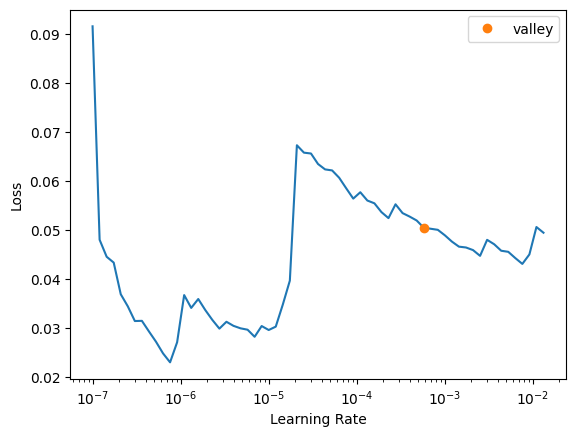

In [162]:
learner2.lr_find()

Fine Tuning the Model

epoch,train_loss,valid_loss,accuracy,time
0,0.050519,0.362354,0.857143,00:03
1,0.030235,0.366620,0.873016,00:03
2,0.030590,0.390356,0.857143,00:03
3,0.025169,0.384723,0.841270,00:03
4,0.030180,0.393532,0.857143,00:03
5,0.030055,0.376279,0.873016,00:03


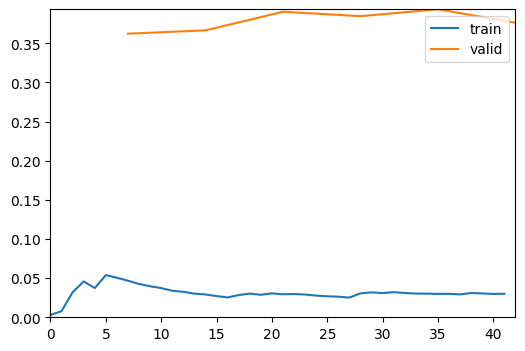

In [163]:
learner2.fit_one_cycle(6, 0.0005754399462603033, cbs=[ShowGraphCallback()])

In [166]:
learner2.fine_tune(15)

epoch,train_loss,valid_loss,accuracy,time
0,0.012341,0.322418,0.920635,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.015021,0.318237,0.920635,00:03
1,0.008492,0.332724,0.936508,00:04
2,0.008976,0.313175,0.920635,00:03
3,0.006481,0.297871,0.920635,00:03
4,0.005591,0.285539,0.920635,00:04
5,0.011030,0.451642,0.920635,00:04
6,0.017115,0.379545,0.920635,00:03
7,0.015148,0.323490,0.904762,00:03
8,0.012635,0.348758,0.873016,00:04
9,0.011828,0.307081,0.888889,00:03


Model Results

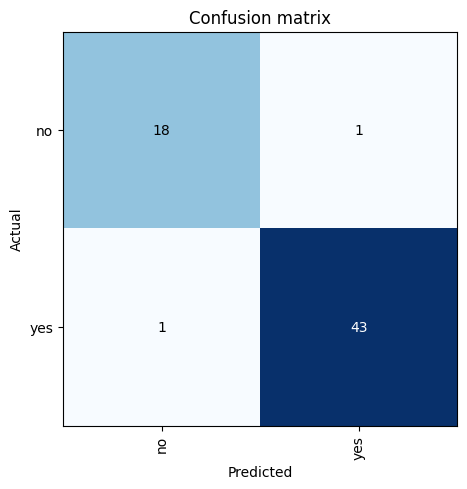

In [167]:
interp2 = ClassificationInterpretation.from_learner(learner2)
interp2.plot_confusion_matrix()

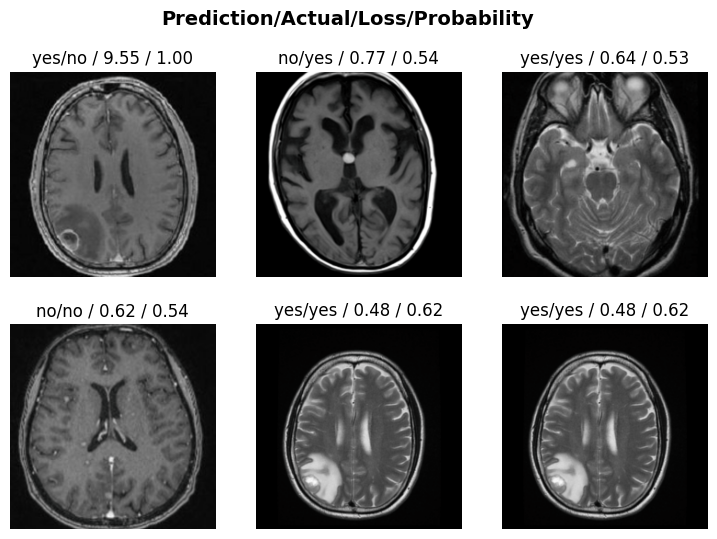

In [168]:
interp2.plot_top_losses(6)

Saving the Model

In [169]:
learner2.export("/tmp/model_2.pkl")

Sample Predictions from Saved Model

In [171]:
model_export2 = load_learner("/tmp/model_2.pkl")

In [172]:
model_export2.predict(tumour_imgs[5])

('yes', tensor(1), tensor([4.5664e-05, 9.9995e-01]))

## **Using DenseNet169**

---



Model Initialization

In [174]:
learner3 = vision_learner(data, models.densenet169, metrics=accuracy).to_fp16()

Training the Model

In [176]:
learner3.fit(15)

epoch,train_loss,valid_loss,accuracy,time
0,1.292907,0.283448,0.904762,00:07
1,0.896984,0.388256,0.904762,00:04
2,0.634434,0.387455,0.904762,00:04
3,0.522182,0.405461,0.888889,00:03
4,0.395134,0.470719,0.873016,00:03
5,0.325007,0.399953,0.888889,00:04
6,0.265178,0.303193,0.904762,00:03
7,0.222719,0.275655,0.952381,00:03
8,0.197260,0.286315,0.920635,00:04
9,0.166803,0.319235,0.936508,00:04


Determining Optimal Learning Rate

SuggestedLRs(valley=6.30957365501672e-05)

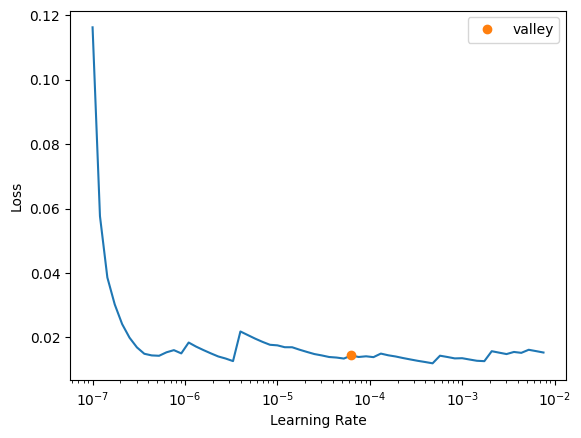

In [182]:
learner3.lr_find()

Fine Tuning the Model

epoch,train_loss,valid_loss,accuracy,time
0,0.021163,0.365116,0.936508,00:07
1,0.028172,0.358621,0.936508,00:04
2,0.023516,0.367936,0.936508,00:03
3,0.029862,0.370996,0.936508,00:03
4,0.023545,0.363440,0.936508,00:04
5,0.030725,0.355314,0.936508,00:03


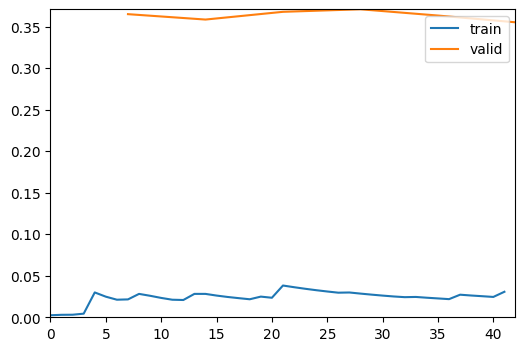

In [183]:
learner3.fit_one_cycle(6, 6.30957365501672e-05, cbs=[ShowGraphCallback()])

In [186]:
learner3.fine_tune(15)

epoch,train_loss,valid_loss,accuracy,time
0,0.018114,0.549345,0.920635,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.011993,0.544278,0.920635,00:04
1,0.053407,0.593101,0.920635,00:04
2,0.034602,0.647448,0.936508,00:05
3,0.024810,0.604086,0.936508,00:05
4,0.030341,0.603245,0.936508,00:04
5,0.028761,0.738734,0.920635,00:04
6,0.032222,1.157768,0.873016,00:05
7,0.038067,0.818419,0.920635,00:04
8,0.038572,0.652546,0.920635,00:04
9,0.035156,0.556047,0.904762,00:04


Model Results

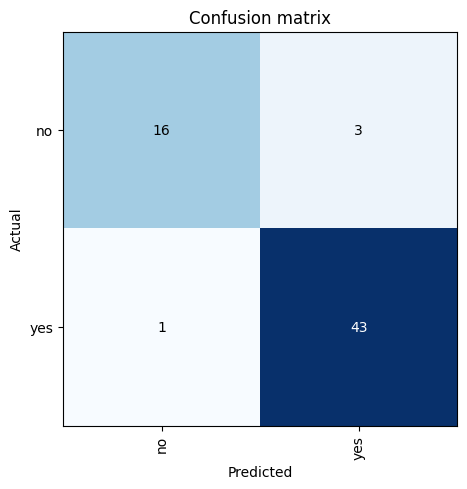

In [188]:
interp3 = ClassificationInterpretation.from_learner(learner3)
interp3.plot_confusion_matrix()

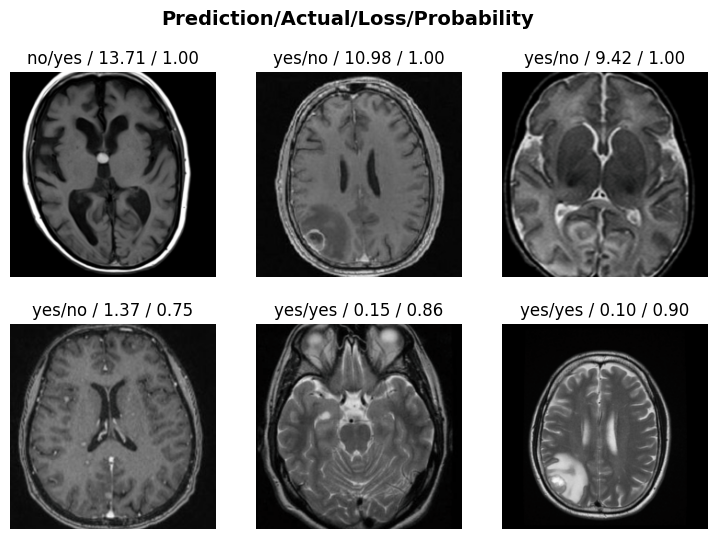

In [189]:
interp3.plot_top_losses(6)

Saving the Model

In [190]:
learner3.export("/tmp/model_3.pkl")

Sample Predictions from Saved Model

In [191]:
model_export3 = load_learner("/tmp/model_3.pkl")

In [192]:
model_export3.predict(tumour_imgs[8])

('yes', tensor(1), tensor([8.7040e-06, 9.9999e-01]))

# **Tumour Locator Function**

---



## **Canny Edge Detection**

---



In [193]:
def auto_canny(img, sigma=0.33):

    med = np.median(img)

    img_lower = int(max(0, (1.0 - sigma) * med))
    img_upper = int(min(255, (1.0 + sigma) * med))

    img_edged = cv2.Canny(img, img_lower, img_upper)

    return img_edged

## **Main Function**

---



In [243]:
def tumour_locator(im1, show_process = False):

  im1gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

  (T, im1thresh) = cv2.threshold(im1gray, 155, 255, cv2.THRESH_BINARY)

  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
  im1closed = cv2.morphologyEx(im1thresh, cv2.MORPH_CLOSE, kernel)

  im1erode  = cv2.erode(im1closed, None, iterations = 5)
  im1dilate = cv2.dilate(im1erode, None, iterations = 5)

  ret,mask = cv2.threshold(im1dilate, 155, 255, cv2.THRESH_BINARY)
  im1final = cv2.bitwise_and(im1, im1, mask = mask)

  im1canny = auto_canny(im1dilate)

  (cnts, _) = cv2.findContours(im1canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cv2.drawContours(im1, cnts, -1, (0, 0, 255), 2)

  if(show_process == True):

    plt.subplots(figsize=(15,8))

    plt.subplot(2,4,1)
    plt.imshow(im1gray, "gray")
    plt.title("Grayscale Image")

    plt.subplot(2,4,2)
    plt.imshow(im1thresh)
    plt.title("Thresholding Result")


    plt.subplot(2,4,3)
    plt.imshow(im1closed)
    plt.title("Morphological Operations")

    plt.subplot(2,4,4)
    plt.imshow(im1erode)
    plt.title("Erosion Effect")

    plt.subplot(2,4,5)
    plt.imshow(im1dilate)
    plt.title("Dilation Effect")

    plt.subplot(2,4,6)
    plt.imshow(im1final)
    plt.title("Segmented Tumour")

    plt.subplot(2,4,7)
    plt.imshow(im1canny)
    plt.title("Canny Edge Detection")

    plt.subplot(2,4,8)
    plt.imshow(im1)
    plt.title("Final Result")


  return im1

## **Implementing Function**

---



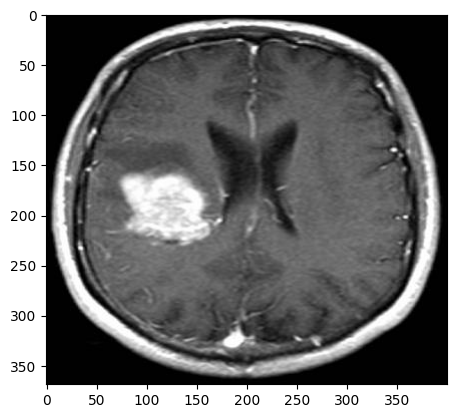

In [244]:
im = cv2.imread(yes_folder+img_list[15])
plt.imshow(im)

<ipython-input-243-ef8716f55543>:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,1)


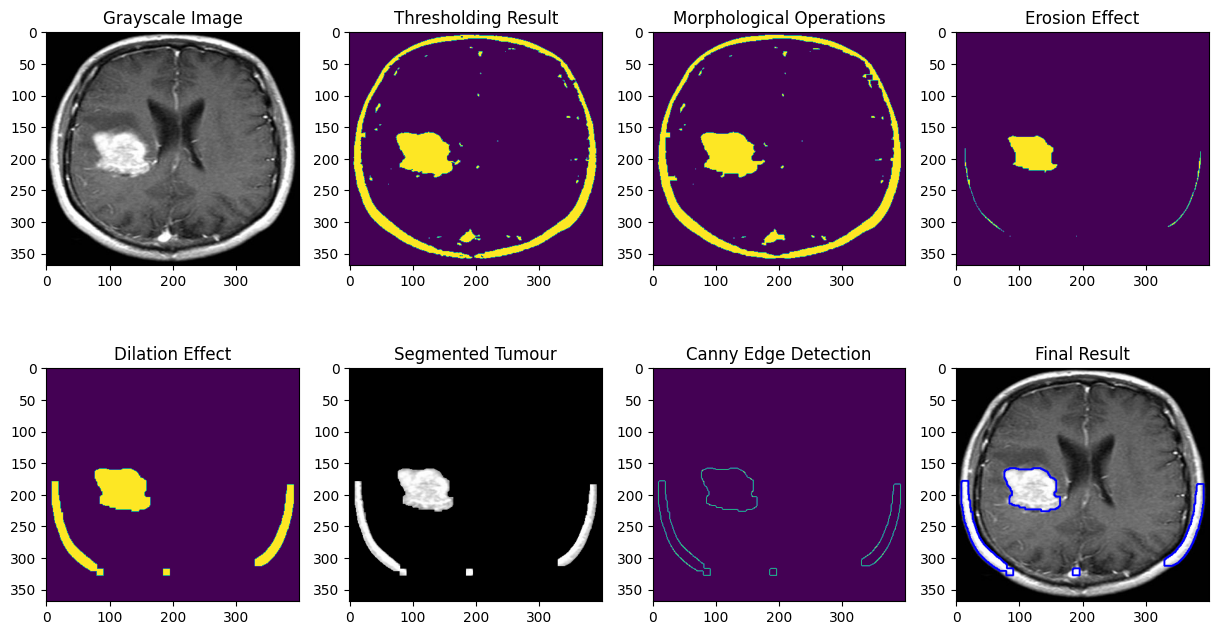

In [245]:
imdisp = tumour_locator(im, show_process=True)

## **Bunch Results**

---



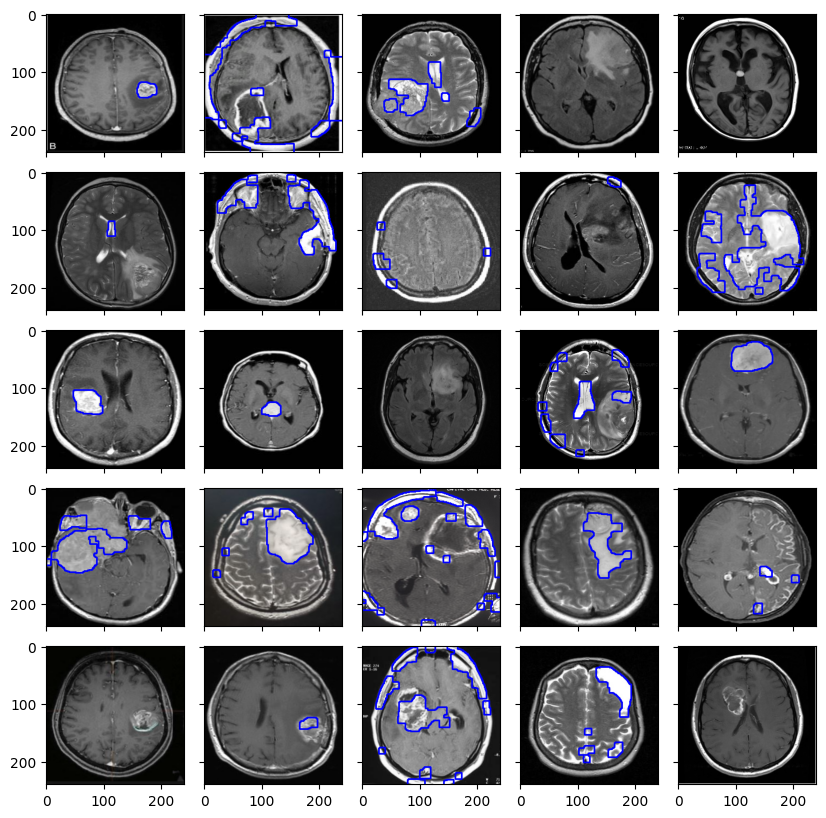

In [248]:
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 5),  axes_pad=0.2)

for ax,img in zip(grid, tumour_imgs[5:31]):

    img = tumour_locator(img)
    ax.imshow(img)

plt.show()